The total rows in the training dataset: 45211
The total columns in the training dataset: 1
The total rows in the test dataset: 45211
The total columns in the test dataset: 1
Both train and test have the same columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB
Column names in the dataset:
Index(['age;"job";"marital";"education";"default";"balance";"housing";"

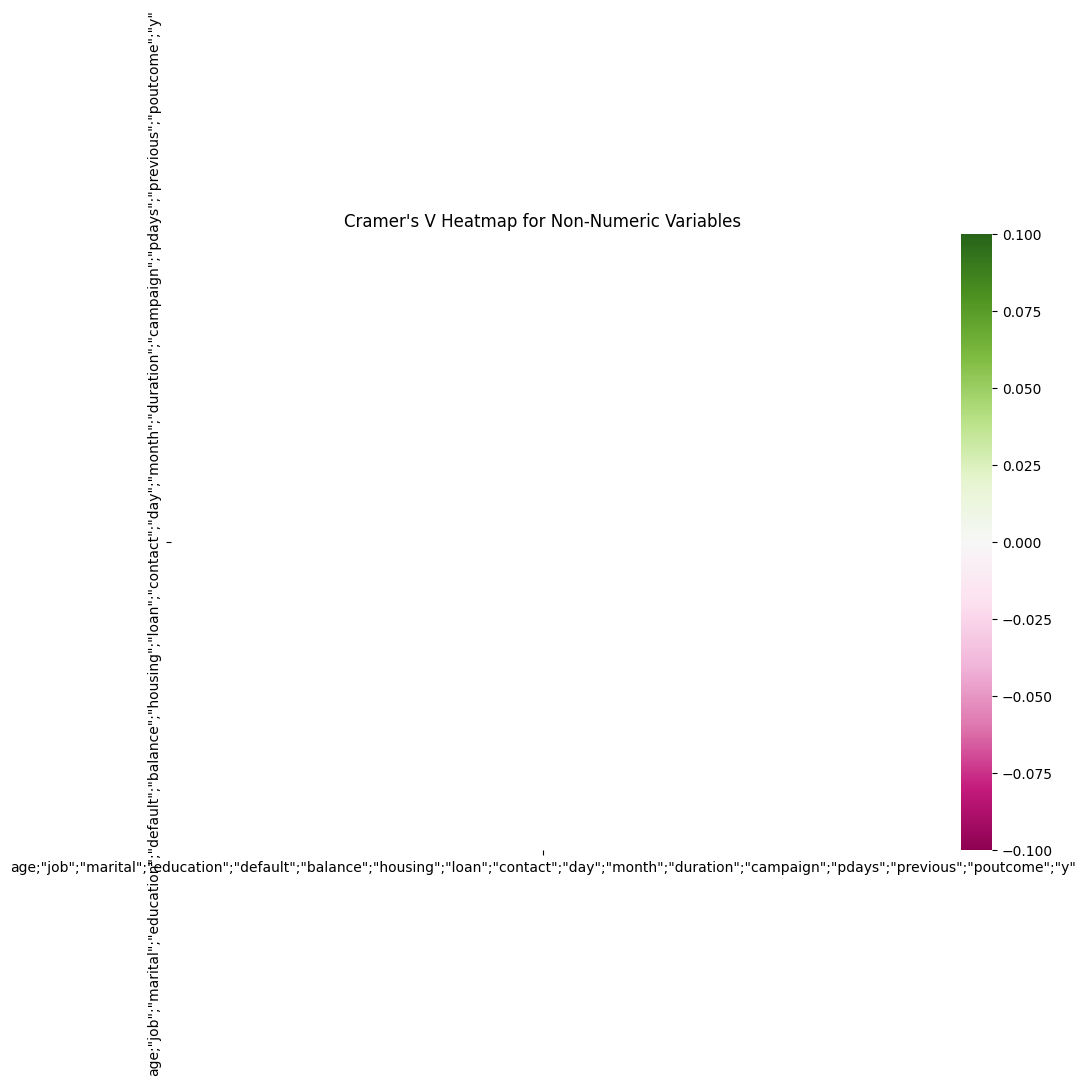

ValueError: Could not interpret input 'replace_with_actual_feature_name'

<Figure size 800x600 with 0 Axes>

In [12]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")

# Setting Pandas display options to show more columns
pd.set_option('display.max_columns', 100)

# Loading the train data and viewing the first few rows
train = pd.read_csv(r"C:\Users\PRIYANKA\OneDrive\Documents\bank\bank-full.csv")
train.head()

# Loading the test data and viewing the first few rows (assuming the test data has the same format)
test = pd.read_csv(r"C:\Users\PRIYANKA\OneDrive\Documents\bank\bank-full.csv")
test.head()

# Checking the dimension of the training dataset
print("The total rows in the training dataset:", train.shape[0])
print("The total columns in the training dataset:", train.shape[1])

# Checking the dimension of the test dataset
print("The total rows in the test dataset:", test.shape[0])
print("The total columns in the test dataset:", test.shape[1])

# Checking the missing columns in the test dataset
def check_column_similarity(data1, data2):
    if len(data1.columns) == len(data2.columns):
        print('Both train and test have the same columns')
    else:
        print("Column length is different.")
        if len(data1.columns) > len(data2.columns):
            print(set(data1.columns) - set(data2.columns))
        else:
            print(set(data2.columns) - set(data1.columns))

check_column_similarity(train, test)

# Checking the data types and missing values
train.info()

# Counting the data types in the dataset
train.dtypes.value_counts()

# Checking for missing values
train.isnull().sum()

# Descriptive Statistical Analysis
train.describe(include='all')

# Finding the correct column name
# You can list the column names to find the correct one
print("Column names in the dataset:")
print(train.columns)

# Assuming the correct column name is 'y' (change it to the correct column name)
correct_column_name = 'subscribed'


if correct_column_name not in train.columns:
    print(f"Column '{correct_column_name}' not found in the dataset.")
else:
    # Plotting the frequency of the correct column
    sns.countplot(data=train, x=correct_column_name)
    plt.title(f"Frequency of '{correct_column_name}'")

    # Normalizing the frequency table of the correct column
    print(f"Counts of '{correct_column_name}' values:")
    print(train[correct_column_name].value_counts())

# Selecting the non-numerical columns
print("The non-numerical columns are:")
data_non_numerical = train.select_dtypes(object)
print(data_non_numerical)

# Create a function to calculate Cramer's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

sample_size = 10000
data_non_numerical_sample = data_non_numerical.sample(n=sample_size, random_state=42)

# Create a matrix of Cramer's V values between variables for the sample
columns_sample = data_non_numerical_sample.columns
cramer_matrix_sample = pd.DataFrame(index=columns_sample, columns=columns_sample)
for col1 in columns_sample:
    for col2 in columns_sample:
        cramer_matrix_sample.loc[col1, col2] = cramers_v(data_non_numerical_sample[col1], data_non_numerical_sample[col2])
# Create a heatmap from the Cramer's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramer_matrix_sample.astype(float), annot=True, cmap="PiYG", linewidth=.5)
plt.title("Cramer's V Heatmap for Non-Numeric Variables")
plt.show()

# Replace 'replace_with_actual_feature_name' with the actual name of the categorical feature you want to visualize
selected_feature = 'replace_with_actual_feature_name'  # Replace this with the feature name

plt.figure(figsize=(8, 6))
sns.countplot(x=selected_feature, data=data_non_numerical, palette='pink', hue="subscribed", edgecolor="black")
plt.title(f'Bar Plot of {selected_feature} vs. Subscribed')
plt.xlabel(selected_feature)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


